In [1]:
import numpy as np
import random
import statistics as st
import matplotlib.pyplot as plt
import math

In [2]:
%matplotlib inline

In [500]:
class Car():
    
    def __init__(self, location, current_speed=25):
        self.max_s = 33 #In meters per second truncating 33.333 to 33
        self.length = 5 #In meters
        self.cs = current_speed #current speed
        self.location = location
        self.distance = 0
    
    
    
    def change_speed(self):
        choice = random.random()
        if choice < .1:
            self.cs -= 2
        elif self.cs == self.max_s:
            pass
        else:
            self.cs += 2
            if self.cs > self.max_s:
                self.cs = self.max_s
                
            
    def drive(self):
        self.location += self.cs
      
        

In [501]:
class Road():
    
    def __init__(self):
        pass
    
    def pop_road(self):
        self.cars = [Car(int((n*33.33)+4)) for n in range(30)]
    
      
    def get_car_locations(self, car):
        return self.cars[car]
    
    def check_speed(self, car):
        if car == 29:
            pass
        elif (self.cars[car].location + self.cars[car].cs) >= (self.cars[car+1].location - 4):
            self.cars[car].cs = self.cars[car+1].cs
    
    def crash(self, car):
        if car == 29:
            pass
        elif (self.cars[car].location + self.cars[car].cs) >= (self.cars[car+1].cs + self.cars[car+1].location - 4):
            self.cars[car].location = self.cars[car+1].cs + self.cars[car+1].location - 5
            self.cars[car].cs = 0
        else:
            pass

        

In [511]:
class Simulation():
    
    def __init__(self):
        self.road = Road()
        self.road.pop_road()
        self.crash = 0
        self.car_speed = []
        self.all_speeds = []
        self.car_locations = [1] * 1000
        self.all_locations = []
        
    
    def tick(self):
        for car in range(30):
            self.road.cars[car].change_speed()   #Car decides to speed up or slow down.
            self.road.check_speed(car) #Car checks if there's a car in its "zone of danger"
        for car in range(30):
            self.road.crash(car) #Checks for crashes now that we've set the data
            if self.road.cars[car].cs == 0:
                self.crash += 1
            self.road.cars[car].drive() #actually makes dem boats go
            self.car_speed.append(self.road.cars[car].cs)
            if self.road.cars[car].location > 1000: 
                self.road.cars.insert(0,Car(0,self.road.cars[car].cs))
                del self.road.cars[car + 1] #Gets rid of cars that drive off the end
                self.car_locations[self.road.cars[0].location] = 0
            else:
                self.car_locations[self.road.cars[car].location] = 0
        
        self.all_speeds.append(self.car_speed)
        self.all_locations.append(self.car_locations)
        self.car_speed = []
        self.car_locations = [1] * 1000
                
        #unfinished
        

In [512]:
sim = Simulation()

In [510]:
sims = [Simulation() for x in range(10)]
for sim in sims:
    [sim.tick() for _ in range(60)]

IndexError: list assignment index out of range

In [474]:
speeds = np.array([sim.all_speeds for sim in sims])

In [475]:
this = np.array([sim.all_speeds for sim in sims])

In [476]:
print(np.mean(this))
print(np.std(this))

24.5333888889
4.51284545171


In [425]:
np.shape(this)

(10, 60, 30)

In [516]:
graph = np.array(sim.all_locations).astype('float32')

[[ 1.  1.  1. ...,  0.  1.  1.]
 [ 0.  1.  1. ...,  1.  1.  1.]
 [ 0.  1.  1. ...,  1.  1.  1.]
 ..., 
 [ 0.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 0.  1.  1. ...,  1.  1.  1.]]


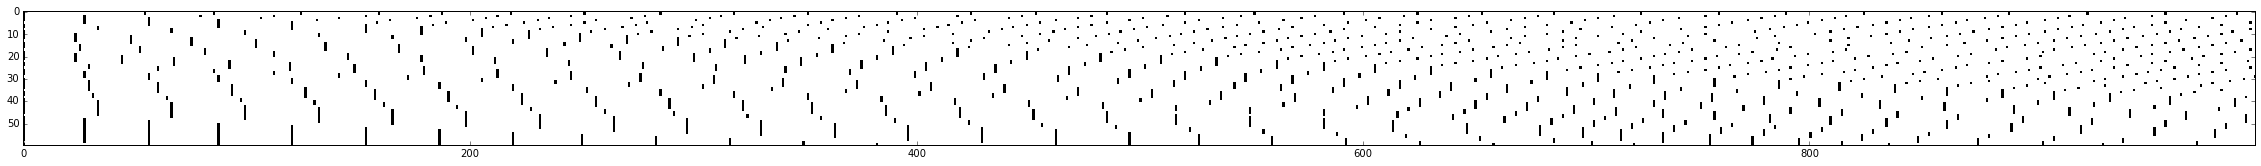

In [518]:

print(graph)

plt.figure(figsize=(40, 40)) # size is in "inches"
plt.imshow((graph), cmap='gray', interpolation='nearest')
plt.show()

In [171]:
list1.insert(0,6)

In [172]:
list1

[6, 1, 2, 3, 4, 5]

In [389]:
- 0 - 1

-1

In [513]:
[sim.tick() for _ in range(60)]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[[ 1.  1.  1. ...,  0.  1.  1.]
 [ 1.  1.  1. ...,  1.  0.  1.]
 [ 1.  0.  1. ...,  1.  0.  1.]
 ..., 
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 0.  1.  0. ...,  1.  1.  1.]
 [ 1.  1.  0. ...,  0.  1.  0.]]


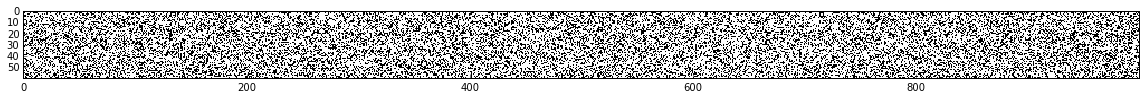

In [450]:
img_data = np.random.choice([0,1,1], (60, 1000)).astype('float32')
print(img_data)

plt.figure(figsize=(20, 20)) # size is in "inches"
plt.imshow(img_data, cmap='gray', interpolation='nearest')

In [489]:
np.shape(graph)

(60, 1030)

In [514]:
[print(car.location) for car in sim.road.cars]

0
56
87
120
153
186
219
250
283
316
349
382
462
495
526
559
592
625
658
702
721
755
774
795
814
835
875
904
931
973


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]